In [1]:
import numpy as np
from scipy.misc import factorial
from scipy.optimize import brentq
import matplotlib.pyplot as plt

# Problema

Sia X un importo iniziale fissato. Qual è la successione $p_n$ (con $n = 0,..,N-1$) di interessi percentuali che permette di ottenere un importo Y partendo da X? 

Ovvero, trovare la successione che soddisfa la seguente equazione:
\begin{equation}
\prod_{n=0}^{N-1} (1+p_n) - \frac{Y}{X} = 0 
\end{equation}

## Costanti

In [20]:
X = 10.
Y = 1000.
N = 365
alpha = -1. # float : slope of the power-law p_n = const * n^alpha

## Calcolatore

In [21]:
n = np.arange(1, N+1, 1) # integer progression n = 1,2,..,N

def power_law(const, slope):
    pn = np.ones(N) * const * n**slope # calculate p_n as p_n = const * n^slope
    return np.prod(1. + pn) - Y/X 

p0 = brentq(power_law, 0., 1., args=(alpha)) # solve equation
pn = np.ones(N) * p0 * n**alpha 

## Testa e mostra grafico

In [45]:
print 'Dopo %i giorni, si ottiene Y = %.2f' % (N, X * np.prod(1. + pn))
print 'con una differenza di %.2e rispetto al valore iniziale.' % (Y-X * np.prod(1. + pn))
print 'Si parte con un tasso del %.2f percento' % (pn[0]*100)
print 'e si arriva ad un tasso del %.2f percento' % (pn[-1]*100)

Dopo 365 giorni, si ottiene Y = 1000.00
con una differenza di 3.18e-12 rispetto al valore iniziale.
Si parte con un tasso del 76.66 percento
e si arriva ad un tasso del 0.21 percento


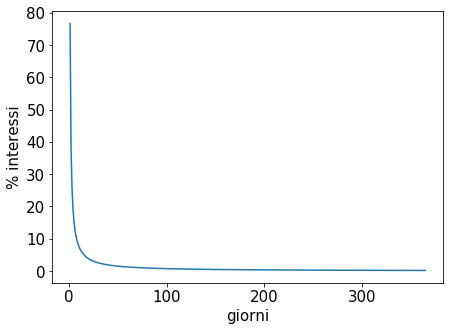

In [42]:
plt.rcParams["figure.figsize"] = (7,5)
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
fig, ax = plt.subplots()
ax.set_ylabel("% interessi")
ax.set_xlabel("giorni")
ax.plot(n, pn*100.)
plt.show()